In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *

In [2]:
avila = pd.read_csv('./input/training_dataset.csv')
avila.head()

,id,0,1,2,3,4,5,6,7,8,9,author
0,0,0.142636,0.431070,0.032912,-0.486796,0.261718,-1.013906,-0.081827,0.330352,0.438262,-0.761088,Ubuntius
1,1,0.019197,0.525284,0.068476,0.166658,0.261718,0.231839,0.635431,0.133209,0.313536,-0.002374,Philippus
2,2,0.093260,-0.087108,-2.268081,-0.164963,0.261718,1.477585,0.635431,-0.370641,0.126447,1.078357,Marcus
3,3,-0.017834,-0.228430,0.370770,1.293671,0.172340,-0.058835,0.446679,1.609556,2.277968,-0.172339,Clarius
4,4,0.080916,-0.142067,0.171611,-0.470713,0.261718,-0.141884,-0.044076,0.375551,0.032902,0.009898,Philippus


In [3]:
print(avila.dtypes)

id          int64
0         float64
1         float64
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
9         float64
author     object
dtype: object


In [4]:
avila.author.value_counts()

Marcus                5118
Philippus             2345
Ovionicus             1303
Blanquius             1017
Paithonius             643
Clarius                623
Ubuntius               539
FerrumEffractarius     429
Name: author, dtype: int64

In [5]:
avila

,id,0,1,2,3,4,5,6,7,8,9,author
0,0,0.142636,0.431070,0.032912,-0.486796,0.261718,-1.013906,-0.081827,0.330352,0.438262,-0.761088,Ubuntius
1,1,0.019197,0.525284,0.068476,0.166658,0.261718,0.231839,0.635431,0.133209,0.313536,-0.002374,Philippus
2,2,0.093260,-0.087108,-2.268081,-0.164963,0.261718,1.477585,0.635431,-0.370641,0.126447,1.078357,Marcus
3,3,-0.017834,-0.228430,0.370770,1.293671,0.172340,-0.058835,0.446679,1.609556,2.277968,-0.172339,Clarius
4,4,0.080916,-0.142067,0.171611,-0.470713,0.261718,-0.141884,-0.044076,0.375551,0.032902,0.009898,Philippus
...,...,...,...,...,...,...,...,...,...,...,...,...
12012,12012,0.352481,0.211237,0.306755,-0.946242,0.172340,0.190314,0.371178,0.436691,0.064084,0.090426,Marcus
12013,12013,0.019197,-0.087108,0.292529,0.240776,0.172340,0.148790,-0.195078,-0.999894,-0.590727,0.365946,Marcus
12014,12014,0.624046,-2.426761,0.178724,0.711352,1.066121,-0.930856,-0.836835,0.397297,0.937165,-0.277726,Blanquius
12015,12015,0.130292,0.870736,-3.210528,0.062493,0.261718,0.522513,0.446679,1.069283,0.188810,0.338859,Marcus


In [6]:
avila.shape

(12017, 12)

In [7]:
print(avila.dtypes)

id          int64
0         float64
1         float64
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
9         float64
author     object
dtype: object


In [8]:
avila.isna().sum()

id        0
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
author    0
dtype: int64

In [9]:
avila.describe()

,id,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,6008.000000,0.019518,0.029916,-0.004594,-0.014289,0.004577,0.006347,0.030889,-0.000169,-0.009445,-0.020024
std,3469.153427,0.978726,3.654967,1.078240,0.988741,0.966598,1.112374,1.252435,1.005326,1.081102,0.984810
min,0.000000,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090691,-5.486218,-6.719324
25%,3004.000000,-0.116585,-0.251983,0.064919,-0.542563,0.172340,-0.598658,-0.044076,-0.545477,-0.372457,-0.525687
50%,6008.000000,0.056229,-0.047852,0.214288,0.080127,0.261718,-0.058835,0.220177,0.105386,0.064084,-0.041421
75%,9012.000000,0.216699,0.203385,0.345875,0.615571,0.261718,0.564038,0.446679,0.650007,0.500624,0.508679
max,12016.000000,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


In [10]:
correlacionAvila = avila.corr()
correlacionAvila

,id,0,1,2,3,4,5,6,7,8,9
id,1.000000,-0.018720,-0.012011,-0.002319,0.002494,-0.012632,-0.013385,0.001252,0.000923,-0.013257,-0.010348
0,-0.018720,1.000000,-0.034470,0.033319,-0.048570,0.419491,-0.046590,-0.031043,-0.069932,0.077196,0.005076
1,-0.012011,-0.034470,1.000000,0.404319,-0.005041,-0.060451,0.394916,0.569620,0.036891,0.320835,-0.028935
2,-0.002319,0.033319,0.404319,1.000000,0.136911,0.004298,0.109612,0.266143,0.029505,0.164784,-0.064575
3,0.002494,-0.048570,-0.005041,0.136911,1.000000,0.095695,0.258998,0.064451,0.352031,0.274606,0.321449
4,-0.012632,0.419491,-0.060451,0.004298,0.095695,1.000000,0.047305,0.036884,-0.082471,0.285097,0.160481
5,-0.013385,-0.046590,0.394916,0.109612,0.258998,0.047305,1.000000,0.466022,-0.038380,0.219353,0.779156
6,0.001252,-0.031043,0.569620,0.266143,0.064451,0.036884,0.466022,1.000000,0.011868,0.259350,0.292490
7,0.000923,-0.069932,0.036891,0.029505,0.352031,-0.082471,-0.038380,0.011868,1.000000,0.493877,0.008542
8,-0.013257,0.077196,0.320835,0.164784,0.274606,0.285097,0.219353,0.259350,0.493877,1.000000,0.207351


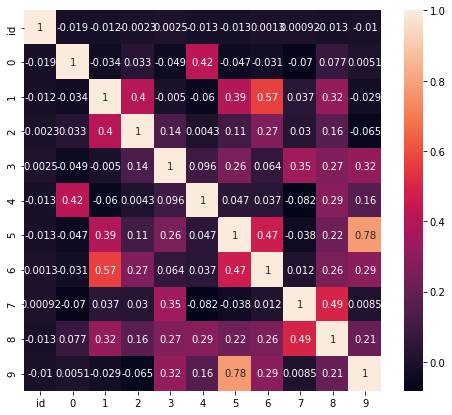

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax_newCorr = plt.subplots(figsize=(8,7))  
ax_corr = sns.heatmap(correlacionAvila, annot = True)

In [12]:
X = avila[["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]]
y = avila["author"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
models = {
    "Linear": LinearSVC(max_iter=300),
    "neighbors": KNeighborsClassifier(),
    "histboosting": HistGradientBoostingClassifier(),
    "histboosting0.2": HistGradientBoostingClassifier(learning_rate=0.25),
    "forest300,50": RandomForestClassifier(n_estimators=300, max_depth=10),
    "Gradientboosting" : GradientBoostingClassifier()
}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=30)
    print(f"{name} accuracy => {np.mean(scores)}")

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Linear accuracy => 0.5399842061512885
neighbors accuracy => 0.7565130922693266
histboosting accuracy => 0.9994168744804653
histboosting0.2 accuracy => 0.9998333333333334
forest300,50 accuracy => 0.8770924771404821
Gradientboosting accuracy => 0.9414089775561099


# Luego de entrenar el modelo paso ahora a limpiar el dataset del test:

In [16]:
avilaTest = pd.read_csv('./input/test_dataset.csv',)
avilaTest1 = avilaTest.drop(columns='id')
avilaTest1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.019197,0.038511,0.192950,0.323367,0.261718,-0.100360,0.106925,0.463833,0.064084,-0.025146
1,0.006853,0.462474,-0.016878,0.649795,-1.347089,-0.307984,-0.119577,0.855597,0.375899,-0.092040
2,0.229043,-0.369751,0.484575,0.250174,0.261718,-0.017310,0.446679,0.232984,-0.123005,-0.126856
3,-0.104241,-0.055704,0.299642,0.391249,0.172340,0.314889,0.106925,0.220694,0.219991,0.368972
4,1.043737,-0.401156,0.473906,0.506215,0.261718,0.065740,-0.195078,0.515440,-0.808997,0.315303


# Mejor modelo: HistGradientBoostingClassifier (learning rate = 0.25)

In [17]:
avila_HGBC = HistGradientBoostingClassifier(learning_rate=0.25)
avila_train_HGBC = avila_HGBC.fit(X_train, y_train)

In [18]:
y_predHGBC = avila_train_HGBC.predict(avilaTest1)
y_predHGBC

array(['Philippus', 'Philippus', 'Marcus', ..., 'Blanquius', 'Marcus',
       'Philippus'], dtype=object)

In [19]:
bible_pred = pd.DataFrame({'id':avilaTest.id,'author':y_predHGBC})
bible_pred

,id,author
0,0,Philippus
1,1,Philippus
2,2,Marcus
3,3,Marcus
4,4,Marcus
...,...,...
8007,8007,Philippus
8008,8008,Blanquius
8009,8009,Blanquius
8010,8010,Marcus


In [20]:
bible_pred.to_csv('author_Predict12.csv', index=False)